In [13]:
import numpy as np
import struct
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

# File paths for the MNIST dataset files
train_images_path = "/Users/tarunkumararya/2021295_HW3/train-images-idx3-ubyte"
train_labels_path = "/Users/tarunkumararya/2021295_HW3/train-labels-idx1-ubyte"
test_images_path = "/Users/tarunkumararya/2021295_HW3/t10k-images-idx3-ubyte"
test_labels_path = "/Users/tarunkumararya/2021295_HW3/t10k-labels-idx1-ubyte"


In [15]:
# Function to load idx files
def load_idx(filename):
    with open(filename, "rb") as f:
        zero, datatype, dims = struct.unpack(">HBB", f.read(4))
        shape = tuple(struct.unpack(">I", f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)

# Load the images and labels
train_images = load_idx(train_images_path)
test_images = load_idx(test_images_path)
train_labels = load_idx(train_labels_path)
test_labels = load_idx(test_labels_path)

# Display the shapes of the datasets
print('X_train shape before reshaping:', train_images.shape)
print('X_test shape before reshaping:', test_images.shape)
print('y_train shape:', train_labels.shape)
print('y_test shape:', test_labels.shape)


X_train shape before reshaping: (60000, 28, 28)
X_test shape before reshaping: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


In [17]:
# Flatten images and normalize pixel values to range [0, 1]
train_images_normalized = train_images.reshape(train_images.shape[0], 28 * 28).astype("float32") / 255
test_images_normalized = test_images.reshape(test_images.shape[0], 28 * 28).astype("float32") / 255

In [23]:
# One-hot encode labels for use in the neural network
encoder = OneHotEncoder(sparse_output=False)
train_labels_encoded = encoder.fit_transform(train_labels.reshape(-1, 1))
test_labels_encoded = encoder.transform(test_labels.reshape(-1, 1))

# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_temp, y_train, y_temp = train_test_split(train_images_normalized, train_labels_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes after splitting
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

X_train shape: (48000, 784)
X_val shape: (6000, 784)
X_test shape: (6000, 784)
y_train shape: (48000, 10)
y_val shape: (6000, 10)
y_test shape: (6000, 10)


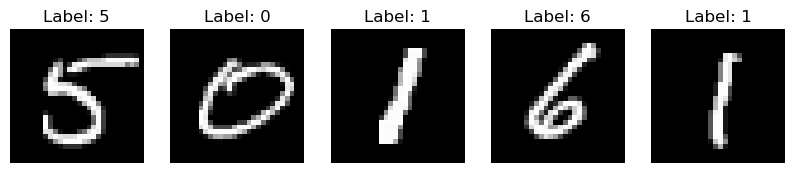

In [25]:
# Function to plot some sample images with labels for quick verification
def plot_numbers(images, labels, num_size=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_size):
        plt.subplot(1, num_size, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap="gray")
        plt.axis("off")
        plt.title(f"Label: {np.argmax(labels[i])}")

# Plot a few images from the training set
plot_numbers(X_train, y_train)
plt.show()

Training model with activation=sigmoid and weight_init=zero
Epoch 10/100 - Train Loss: 2.3011 - Val Loss: 2.3011
Early stopping at epoch 19


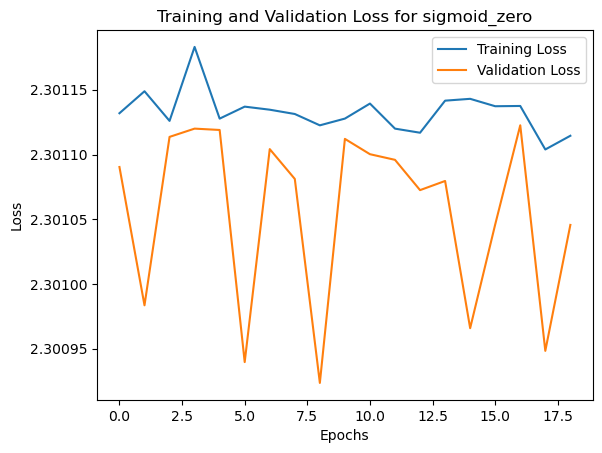

Training model with activation=sigmoid and weight_init=random
Epoch 10/100 - Train Loss: 1.3403 - Val Loss: 1.3440
Epoch 20/100 - Train Loss: 0.8634 - Val Loss: 0.8693
Epoch 30/100 - Train Loss: 0.6751 - Val Loss: 0.6782
Epoch 40/100 - Train Loss: 0.5759 - Val Loss: 0.5763
Epoch 50/100 - Train Loss: 0.5145 - Val Loss: 0.5128
Epoch 60/100 - Train Loss: 0.4727 - Val Loss: 0.4697
Epoch 70/100 - Train Loss: 0.4434 - Val Loss: 0.4397
Epoch 80/100 - Train Loss: 0.4212 - Val Loss: 0.4170
Epoch 90/100 - Train Loss: 0.4038 - Val Loss: 0.3995
Epoch 100/100 - Train Loss: 0.3893 - Val Loss: 0.3851


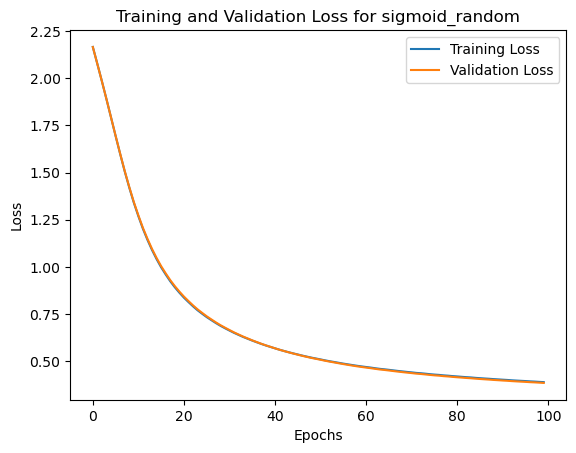

Training model with activation=sigmoid and weight_init=normal
Epoch 10/100 - Train Loss: 2.2812 - Val Loss: 2.2814
Epoch 20/100 - Train Loss: 2.2540 - Val Loss: 2.2544
Epoch 30/100 - Train Loss: 2.1930 - Val Loss: 2.1937
Epoch 40/100 - Train Loss: 2.0081 - Val Loss: 2.0100
Epoch 50/100 - Train Loss: 1.5655 - Val Loss: 1.5680
Epoch 60/100 - Train Loss: 1.1846 - Val Loss: 1.1847
Epoch 70/100 - Train Loss: 0.9723 - Val Loss: 0.9707
Epoch 80/100 - Train Loss: 0.8552 - Val Loss: 0.8529
Epoch 90/100 - Train Loss: 0.7742 - Val Loss: 0.7718
Epoch 100/100 - Train Loss: 0.7091 - Val Loss: 0.7065


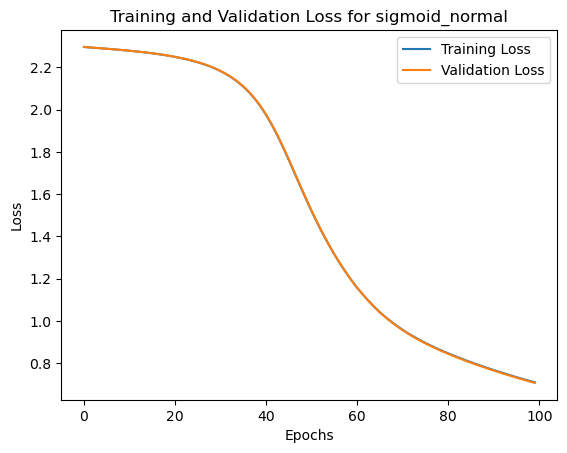

Training model with activation=tanh and weight_init=zero
Epoch 10/100 - Train Loss: 2.3012 - Val Loss: 2.3011
Epoch 20/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Epoch 30/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Epoch 40/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Early stopping at epoch 42


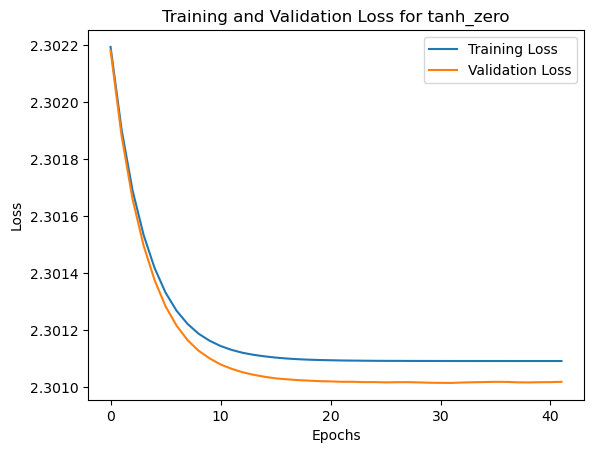

Training model with activation=tanh and weight_init=random
Epoch 10/100 - Train Loss: 0.3936 - Val Loss: 0.3910
Epoch 20/100 - Train Loss: 0.3048 - Val Loss: 0.3172
Epoch 30/100 - Train Loss: 0.2586 - Val Loss: 0.2823
Epoch 40/100 - Train Loss: 0.2279 - Val Loss: 0.2611
Epoch 50/100 - Train Loss: 0.2041 - Val Loss: 0.2459
Epoch 60/100 - Train Loss: 0.1848 - Val Loss: 0.2344
Epoch 70/100 - Train Loss: 0.1687 - Val Loss: 0.2248
Epoch 80/100 - Train Loss: 0.1550 - Val Loss: 0.2170
Epoch 90/100 - Train Loss: 0.1427 - Val Loss: 0.2099
Epoch 100/100 - Train Loss: 0.1318 - Val Loss: 0.2046


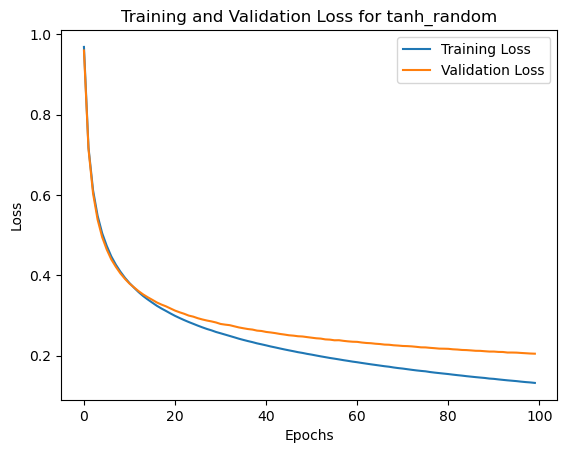

Training model with activation=tanh and weight_init=normal
Epoch 10/100 - Train Loss: 0.3728 - Val Loss: 0.3650
Epoch 20/100 - Train Loss: 0.2863 - Val Loss: 0.2824
Epoch 30/100 - Train Loss: 0.2439 - Val Loss: 0.2456
Epoch 40/100 - Train Loss: 0.2142 - Val Loss: 0.2212
Epoch 50/100 - Train Loss: 0.1911 - Val Loss: 0.2026
Epoch 60/100 - Train Loss: 0.1722 - Val Loss: 0.1883
Epoch 70/100 - Train Loss: 0.1563 - Val Loss: 0.1764
Epoch 80/100 - Train Loss: 0.1428 - Val Loss: 0.1665
Epoch 90/100 - Train Loss: 0.1310 - Val Loss: 0.1584
Epoch 100/100 - Train Loss: 0.1206 - Val Loss: 0.1512


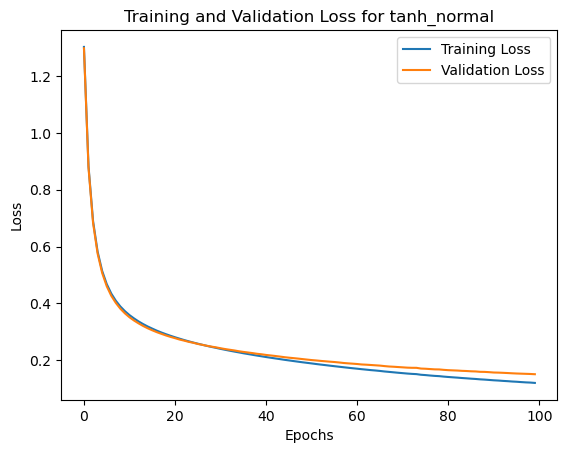

Training model with activation=relu and weight_init=zero
Epoch 10/100 - Train Loss: 2.3012 - Val Loss: 2.3011
Epoch 20/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Epoch 30/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Epoch 40/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Early stopping at epoch 41


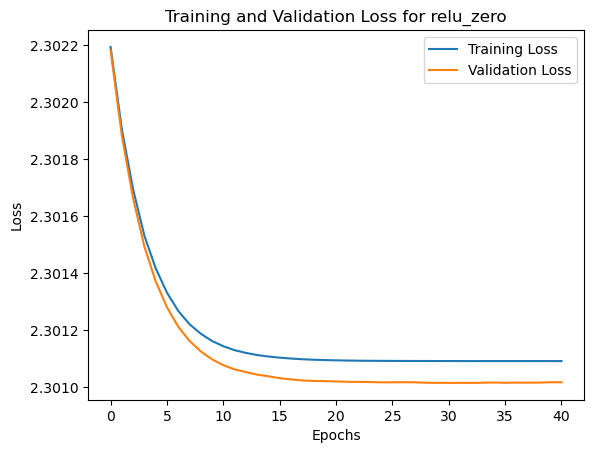

Training model with activation=relu and weight_init=random
Epoch 10/100 - Train Loss: 0.4052 - Val Loss: 0.4652
Epoch 20/100 - Train Loss: nan - Val Loss: nan
Early stopping at epoch 20


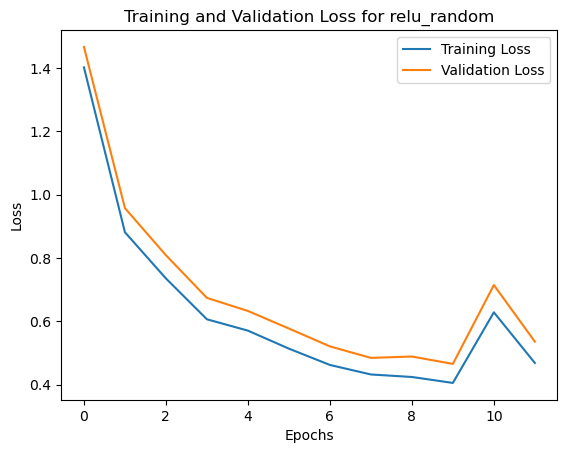

Training model with activation=relu and weight_init=normal
Epoch 10/100 - Train Loss: 0.3267 - Val Loss: 0.3252
Epoch 20/100 - Train Loss: 0.2420 - Val Loss: 0.2453
Epoch 30/100 - Train Loss: 0.1971 - Val Loss: 0.2060
Epoch 40/100 - Train Loss: 0.1669 - Val Loss: 0.1808
Epoch 50/100 - Train Loss: 0.1452 - Val Loss: 0.1631
Epoch 60/100 - Train Loss: 0.1289 - Val Loss: 0.1512
Epoch 70/100 - Train Loss: 0.1138 - Val Loss: 0.1404
Epoch 80/100 - Train Loss: 0.1012 - Val Loss: 0.1309
Epoch 90/100 - Train Loss: 0.0910 - Val Loss: 0.1247
Epoch 100/100 - Train Loss: 0.0827 - Val Loss: 0.1198


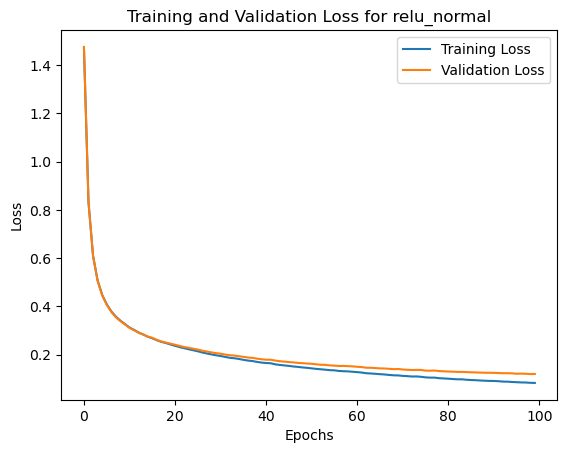

Training model with activation=leaky_relu and weight_init=zero
Epoch 10/100 - Train Loss: 2.3012 - Val Loss: 2.3011
Epoch 20/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Epoch 30/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Epoch 40/100 - Train Loss: 2.3011 - Val Loss: 2.3010
Early stopping at epoch 40


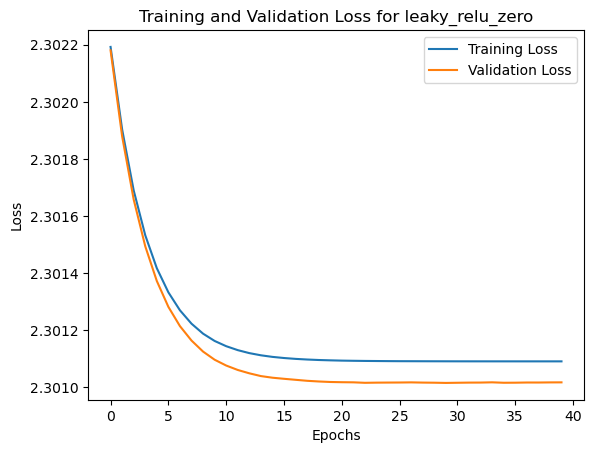

Training model with activation=leaky_relu and weight_init=random
Epoch 10/100 - Train Loss: 0.4160 - Val Loss: 0.4629
Early stopping at epoch 19


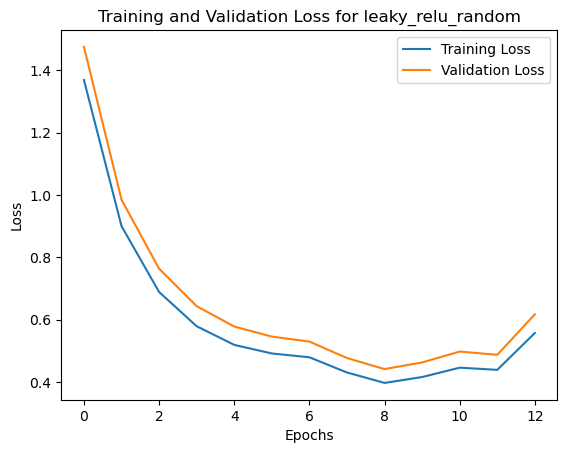

Training model with activation=leaky_relu and weight_init=normal
Epoch 10/100 - Train Loss: 0.3142 - Val Loss: 0.3194
Epoch 20/100 - Train Loss: 0.2384 - Val Loss: 0.2474
Epoch 30/100 - Train Loss: 0.1955 - Val Loss: 0.2085
Epoch 40/100 - Train Loss: 0.1654 - Val Loss: 0.1849
Epoch 50/100 - Train Loss: 0.1440 - Val Loss: 0.1657
Epoch 60/100 - Train Loss: 0.1256 - Val Loss: 0.1517
Epoch 70/100 - Train Loss: 0.1126 - Val Loss: 0.1420
Epoch 80/100 - Train Loss: 0.1002 - Val Loss: 0.1339
Epoch 90/100 - Train Loss: 0.0903 - Val Loss: 0.1265
Epoch 100/100 - Train Loss: 0.0824 - Val Loss: 0.1218


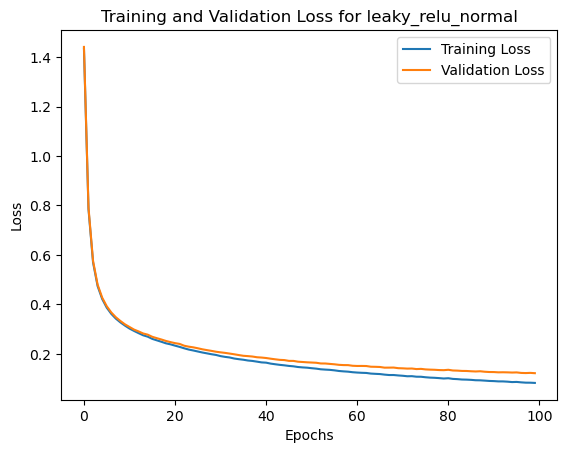

In [7]:
import numpy as np
import struct
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pickle


# Define the Neural Network Class
class NeuralNetwork:
    def __init__(self, N, layer_sizes, lr=2e-3, activation='sigmoid', weight_init='normal', epochs=100, batch_size=128):
        self.N = N
        self.layer_sizes = layer_sizes
        self.lr = lr
        self.activation = activation
        self.weight_init = weight_init
        self.epochs = epochs
        self.batch_size = batch_size
        self.weights = []
        self.biases = []
        self.initialize_weights()

    def initialize_weights(self):
        for i in range(len(self.layer_sizes) - 1):
            if self.weight_init == 'zero':
                W = np.zeros((self.layer_sizes[i], self.layer_sizes[i + 1]))
            elif self.weight_init == 'random':
                W = np.random.uniform(-0.5, 0.5, (self.layer_sizes[i], self.layer_sizes[i + 1]))
            elif self.weight_init == 'normal':
                W = np.random.normal(0, 0.1, (self.layer_sizes[i], self.layer_sizes[i + 1]))
            self.weights.append(W)
            self.biases.append(np.zeros((1, self.layer_sizes[i + 1])))

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def sigmoid_derivative(self, Z):
        return self.sigmoid(Z) * (1 - self.sigmoid(Z))

    def tanh(self, Z):
        return np.tanh(Z)

    def tanh_derivative(self, Z):
        return 1 - np.tanh(Z) ** 2

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return (Z > 0).astype(float)

    def leaky_relu(self, Z, alpha=0.01):
        return np.where(Z > 0, Z, Z * alpha)

    def leaky_relu_derivative(self, Z, alpha=0.01):
        return np.where(Z > 0, 1, alpha)

    def softmax(self, Z):
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))  # for numerical stability
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def forward(self, X):
        self.a = [X]
        for i in range(self.N):
            Z = np.dot(self.a[i], self.weights[i]) + self.biases[i]
            if i == self.N - 1:  # last layer
                A = self.softmax(Z)
            else:
                A = self.sigmoid(Z) if self.activation == 'sigmoid' else self.tanh(Z) if self.activation == 'tanh' else self.relu(Z) if self.activation == 'relu' else self.leaky_relu(Z)
            self.a.append(A)
        return self.a[-1]

    def backward(self, X, Y):
        m = Y.shape[0]
        delta = self.a[-1] - Y 
        for i in reversed(range(self.N)):
            grad_w = np.dot(self.a[i].T, delta) / m
            grad_b = np.sum(delta, axis=0, keepdims=True) / m
            self.weights[i] -= self.lr * grad_w
            self.biases[i] -= self.lr * grad_b
            if i > 0:
                delta = np.dot(delta, self.weights[i].T) * (self.sigmoid_derivative(self.a[i]) if self.activation == 'sigmoid' else self.tanh_derivative(self.a[i]) if self.activation == 'tanh' else self.relu_derivative(self.a[i]) if self.activation == 'relu' else self.leaky_relu_derivative(self.a[i]))

    def fit(self, X_train, y_train, X_val, y_val, early_stopping=False, patience=10):
        train_losses = []
        val_losses = []
        best_val_loss = float('inf')
        epochs_without_improvement = 0
        
        for epoch in range(self.epochs):
            # Shuffle the training data
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_shuffled = X_train[indices]
            y_shuffled = y_train[indices]
    
            for i in range(0, X_train.shape[0], self.batch_size):
                X_batch = X_shuffled[i:i + self.batch_size]
                y_batch = y_shuffled[i:i + self.batch_size]
                self.forward(X_batch)
                self.backward(X_batch, y_batch)
    
            # Compute training and validation losses
            train_loss = self.compute_loss(y_train, self.forward(X_train))
            val_loss = self.compute_loss(y_val, self.forward(X_val))
            train_losses.append(train_loss)
            val_losses.append(val_loss)
    
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch + 1}/{self.epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')
    
            if early_stopping:
                if val_loss < best_val_loss:
                    best_val_loss = val_loss
                    epochs_without_improvement = 0
                else:
                    epochs_without_improvement += 1
                    if epochs_without_improvement >= patience:
                        print(f'Early stopping at epoch {epoch + 1}')
                        return train_losses, val_losses
        
        return train_losses, val_losses


    def compute_loss(self, Y, Y_hat):
        m = Y.shape[0]
        return -np.sum(Y * np.log(Y_hat + 1e-9)) / m  # Adding epsilon for numerical stability

    def predict(self, X):
        return self.forward(X)

    def predict_proba(self, X):
        return self.forward(X)

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return np.mean(np.argmax(Y_pred, axis=1) == np.argmax(Y, axis=1))


# Training the neural network with various configurations
N = len(layer_sizes) - 1
epochs = 100
batch_size = 64

# Activation functions and weight initializations
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
weight_initializations = ['zero', 'random', 'normal']

models = {}

for activation in activation_functions:
    for weight_init in weight_initializations:
        print(f'Training model with activation={activation} and weight_init={weight_init}')
        model = NeuralNetwork(N, layer_sizes, lr=2e-3, activation=activation, weight_init=weight_init, epochs=epochs, batch_size=batch_size)
        train_losses, val_losses = model.fit(X_train, y_train, X_val, y_val, early_stopping=True, patience=10)
        
        model_key = f"{activation}_{weight_init}"
        models[model_key] = model
        with open(f'{model_key}.pkl', 'wb') as f:
            pickle.dump(model, f)

        plt.plot(train_losses, label='Training Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.title(f'Training and Validation Loss for {model_key}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

In [11]:
import pickle
import numpy as np

# Load the test data (assuming you already have these variables prepared)
# X_test and y_test should be your test data features and labels, respectively.

# Define the activation functions and weight initializations used to save the models
activation_functions = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
weight_initializations = ['zero', 'random', 'normal']

# Dictionary to store test accuracies for each model
test_accuracies = {}

for activation in activation_functions:
    for weight_init in weight_initializations:
        model_key = f"{activation}_{weight_init}"
        filename = f'{model_key}.pkl'
        
        # Load the model
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Calculate accuracy
        accuracy = model.score(X_test, y_test)
        test_accuracies[model_key] = accuracy
        
        print(f"Test accuracy for model {model_key}: {accuracy:.4f}")

# Print out all test accuracies for comparison
print("\nTest Accuracies Summary:")
for model_key, accuracy in test_accuracies.items():
    print(f"{model_key}: {accuracy:.4f}")


Test accuracy for model sigmoid_zero: 0.1067
Test accuracy for model sigmoid_random: 0.8880
Test accuracy for model sigmoid_normal: 0.7862
Test accuracy for model tanh_zero: 0.1067
Test accuracy for model tanh_random: 0.9327
Test accuracy for model tanh_normal: 0.9540
Test accuracy for model relu_zero: 0.1067
Test accuracy for model relu_random: 0.1007
Test accuracy for model relu_normal: 0.9615
Test accuracy for model leaky_relu_zero: 0.1067
Test accuracy for model leaky_relu_random: 0.1007
Test accuracy for model leaky_relu_normal: 0.9628

Test Accuracies Summary:
sigmoid_zero: 0.1067
sigmoid_random: 0.8880
sigmoid_normal: 0.7862
tanh_zero: 0.1067
tanh_random: 0.9327
tanh_normal: 0.9540
relu_zero: 0.1067
relu_random: 0.1007
relu_normal: 0.9615
leaky_relu_zero: 0.1067
leaky_relu_random: 0.1007
leaky_relu_normal: 0.9628
